# 📱💬 SMS Spam Detection Using Machine Learning
---

## 1. Project Title
**SMS Spam Detection Using Machine Learning**

## 2. Introduction
* Spam messages are unsolicited or potentially harmful SMS texts that interfere with
normal communication and consume valuable user time. 
* These messages often include deceptive content, advertisements, or malicious
links, posing risks to both user privacy and security.
* Automatically detecting and filtering out such spam is essential for enhancing the
overall user experience and maintaining a secure messaging environment.
* This project focuses on developing a machine learning model capable of accurately
classifying SMS messages into two categories: "spam" (unwanted messages) and
"ham" (legitimate, non-spam messages). 
* By leveraging natural language processing and predictive algorithms, the model
aims to streamline communication and protect users from digital nuisances and
threats.

## 3. Dataset Description
* The dataset contains approximately 5,500 SMS messages.
* Each message is labeled as **spam** or **ham**.
* Data source: [SMS Spam Collection Dataset from UCI](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)
* The dataset has two columns:
  * `label`: 'spam' or 'ham'
  * `message`: the text content of the SMS

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=['label', 'message'])

# Show first few rows
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 4. Data Preprocessing
* Clean and prepare text data for the model.
* Converting labels (`spam`/`ham`) to binary values (1/0).
* Spliting data into training and testing sets.
* Vectorizing text messages using **CountVectorizer** to convert text into numeric feature vectors.

In [2]:
# Convert labels to numbers: ham=0, spam=1
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# Check distribution of classes
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [3]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42)

print(f"Training messages: {len(X_train)}")
print(f"Testing messages: {len(X_test)}")

Training messages: 4457
Testing messages: 1115


In [4]:
# Convert text messages to numbers (vectorization)
vectorizer = CountVectorizer()

# Learn vocabulary from training data and transform training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform test data (using the same vocabulary)
X_test_vec = vectorizer.transform(X_test)

## 5. Model Selection
* I used the **Multinomial Naive Bayes** algorithm, which is effective for text classification problems.
* Chosen for its simplicity, speed, and good performance on spam detection.

In [5]:
# Create the Naive Bayes model
model = MultinomialNB()

## 6. Training the Model
* Training the Naive Bayes model using the vectorized training data.

In [6]:
# Train the model on training data
model.fit(X_train_vec, y_train)

MultinomialNB()

## 7. Model Evaluation
* Predict labels for the test data.
* Evaluate model using:
  * Accuracy score
  * Confusion matrix
  * Classification report (precision, recall, f1-score)
* This will also visualize the confusion matrix for a better understanding.

In [7]:
# Predict labels for test messages
y_pred = model.predict(X_test_vec)

# Check accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9919282511210762


Confusion Matrix:
[[966   0]
 [  9 140]]


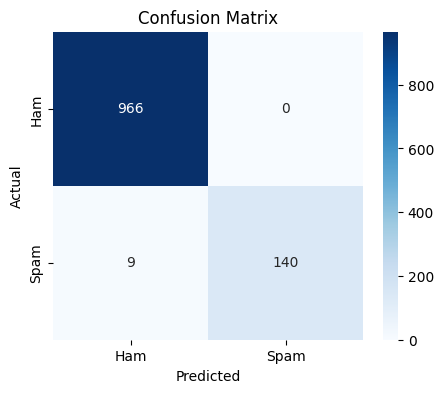

In [8]:
# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Show detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



## 8. Conclusion
* My model achieves high accuracy in distinguishing spam from ham SMS messages.
* This model can be used as a basic filter to improve user experience.
* Possible improvements include using TF-IDF vectorization, hyperparameter tuning, and more advanced algorithms.